<a href="https://colab.research.google.com/github/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/blob/main/PI_4_Predicao_Valores_Imoveis_SJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas
%pip install matplotlib

In [ ]:
%pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<hr>

# <b>1) Identificação e Tratamento Inicial dos Dados</b>

### <li><font color="#800080">Carregando dados, com o preço de aluguéis e características dos imóveis, do arquivo "listings.zip":</font>

In [ ]:
url_dados = 'https://github.com/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/blob/main/dados/new-listings.zip?raw=true'
dados = pd.read_csv(url_dados,compression='zip')

### <li><font color="#800080">Visualizando todas as colunas para identificar todos os atributos disponíveis e a possibilidade de filtrá-los:</font>

In [58]:
pd.set_option('display.max_columns',None)
display(dados.head(3))

,id,resource_id,provider_id,advertiser_id,address_country,address_state,address_city,address_neighborhood,address_street_number,address_street,address_unit_number,address_zipcode,latitude,longitude,title,description,unit_type,amenities,bathrooms,bedrooms,suites,parking_spaces,total_area,usable_area,price,price_monthly_condo_fee,price_rental_total,price_yearly_iptu,publication_type,listing_status,listing_type,created_at,updated_at,raw_data,scraped_at
0,923833,2539419421,61529.0,8132d7f5-ac6e-8229-ac29-66e53d55fe1e,BR,São Paulo,São José dos Campos,Jardim das Indústrias,NaN,NaN,NaN,12241200.0,NaN,NaN,Excelente apartamento para alugar de 2 dormitó...,Excelente Apartamento no Splendor Garden - Jd....,0,"[""POOL"", ""BARBECUE_GRILL"", ""ELEVATOR"", ""SERVIC...",2,2,0,2.0,100,0,3000,482,0,155,STANDARD,NaN,USED,2021-10-28 01:43:54.123+00,2021-10-28 01:43:56.883+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-10-28 05:07:15.43542+00
1,1336880,2549894537,10048.0,5edc5203-b48b-1278-0e4b-36b4bf556daf,BR,São Paulo,São José dos Campos,Jardim América,NaN,Rua Andorra,NaN,12235050.0,NaN,NaN,Apartamento locação Jardim América!!! Spazio C...,Apartamento no Jardim América - Localização es...,0,[],2,3,1,1.0,64,0,1800,290,0,0,STANDARD,NaN,USED,2022-02-01 19:01:11.276+00,2022-02-01 19:01:21.341+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-02-02 05:08:59.620765+00
2,1134517,2546641936,60384.0,ef34904e-bd8d-66bd-cd90-e3f966a6bf3b,BR,São Paulo,São José dos Campos,Jardim São Dimas,NaN,Avenida Doutor Adhemar de Barros,NaN,12245011.0,NaN,NaN,Apartamento Vila Adyana em frente ao Parque Sa...,"118 m2, <br>3 quartos, sendo 1 suíte, <br>Sala...",0,"[""POOL"", ""BARBECUE_GRILL""]",3,3,1,1.0,118,0,2500,750,0,0,STANDARD,NaN,USED,2022-01-04 07:22:09.019+00,2022-01-28 11:21:26.848+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-01-05 05:07:37.423878+00


### <li><font color="#800080">Eliminando colunas que não serão úteis na análise dos dados:</font>

In [59]:
dados_filtrados = dados.drop(columns=["id","resource_id","provider_id","advertiser_id","address_country","address_state","address_city","title","description","unit_type","amenities","usable_area","price_rental_total","publication_type","listing_status","listing_type","created_at","updated_at","raw_data","scraped_at","address_street_number","address_unit_number"])
display(dados_filtrados.head(3))

,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
0,Jardim das Indústrias,NaN,12241200.0,NaN,NaN,2,2,0,2.0,100,3000,482,155
1,Jardim América,Rua Andorra,12235050.0,NaN,NaN,2,3,1,1.0,64,1800,290,0
2,Jardim São Dimas,Avenida Doutor Adhemar de Barros,12245011.0,NaN,NaN,3,3,1,1.0,118,2500,750,0


### <li><font color="#800080">Ordenando os imóveis pelo bairro, pela rua e número de quartos:</font>

In [60]:
dados_filt_ord = dados_filtrados.sort_values(['address_neighborhood','address_street','bedrooms'])
display(dados_filt_ord.head())

,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
55389,Alto da Ponte,Avenida Rui Barbosa,12212531.0,NaN,NaN,1,1,0,0.0,45,880,0,0
24752,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12213900.0,NaN,NaN,1,2,0,1.0,62,1130,0,120
26841,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12212510.0,NaN,NaN,1,2,0,1.0,62,900,400,43
60283,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12212510.0,NaN,NaN,1,2,1,NaN,52,1100,0,0
5015,Alto da Ponte,NaN,12212510.0,NaN,NaN,1,2,0,1.0,54,600,373,0


<hr>

# <b>2) Entendimento, Organização e Limpeza dos Dados (Pré-Processamento)</b>

### <li><font color="#800080">Histograma para entender o nº de quartos dos imóveis na amostra:</font>

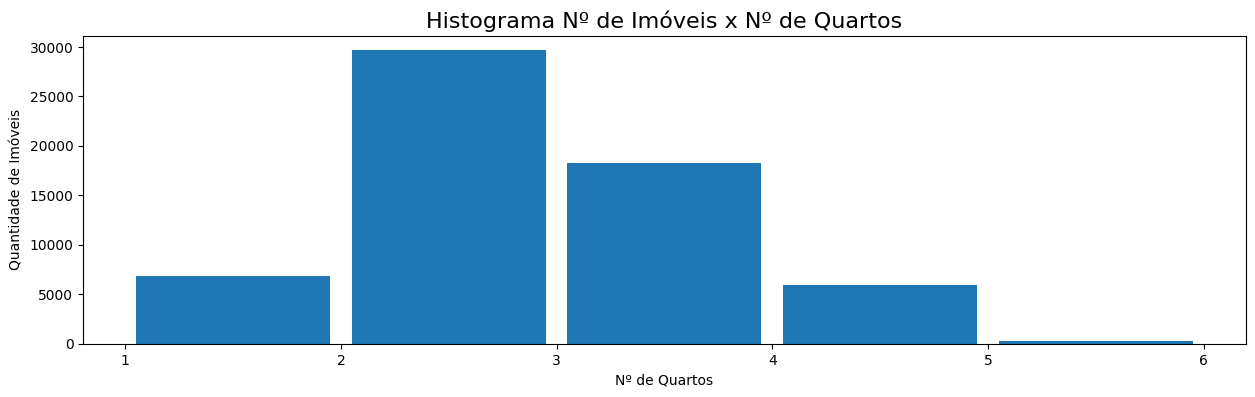

In [8]:
quartos = dados_filt_ord['bedrooms']

plt.figure(figsize=(15,4))
plt.hist(quartos,rwidth=0.9 , bins = range(1,7,1))
plt.title('Histograma Nº de Imóveis x Nº de Quartos', fontsize=16)
plt.xlabel('Nº de Quartos')
plt.ylabel('Quantidade de Imóveis')
plt.show()


### <li><font color="#800080">Exibindo a quantidade de imóveis para cada número de quartos na amostra:</font>

In [9]:
# Mostra qual a quantidade de quartos nos imóveis do conjunto de dados.
dados_bed = dados_filt_ord.sort_values(['bedrooms'])
dados_bed['bedrooms'].unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 16, 17, 19, 20],
      dtype=int64)

In [10]:
# Mostra nº de quartos x nº de imóveis na amostra.
dados_bed['bedrooms'].value_counts()

bedrooms
2     29650
3     18264
1      6859
4      5957
5       210
6        17
10        4
7         2
8         1
9         1
16        1
17        1
19        1
20        1
Name: count, dtype: int64

<font color="#800080"><b>OBS.:</b> Nota-se que podemos desconsiderar imóveis com mais de 5 dormitórios por não serem em uma quantidade representativa no conjunto de dados.</font>

### <li><font color="#800080">Removendo os imóveis com mais de 5 quartos do dataframe:</font>

In [11]:
filtro_bedrooms = dados_bed['bedrooms'] < 6
dados_bed_filt = dados_bed[filtro_bedrooms]
dados_bed_filt['bedrooms'].value_counts()

bedrooms
2    29650
3    18264
1     6859
4     5957
5      210
Name: count, dtype: int64

### <li><font color="#800080">Contando a quantidade de imóveis em cada bairro:</font>

In [12]:
dados_bairros = dados_bed_filt['address_neighborhood'].value_counts()
dados_bairros

address_neighborhood
Parque Residencial Aquarius     11990
Vila Ema                         2920
Jardim Esplanada                 2744
Jardim Satélite                  2714
Jardim das Indústrias            2649
                                ...  
Loteamento Villa Branca             1
Loteamento Portal Santa Inês        1
Parque Interlagos                   1
Jardim America                      1
Portal dos Passaros                 1
Name: count, Length: 206, dtype: int64

<font color="#800080"><b>OBS.:</b> Aparentemente, em alguns bairros não há amostras suficientes para concluir sobre o valor dos aluguéis.</font>

### <li><font color="#800080">Investigando quais bairros possuem menos de 10 amostras no dataframe:</font>

In [13]:
filtro_bairros = dados_bed_filt['address_neighborhood'].value_counts() > 10
filtro_bairros.value_counts()

count
True     129
False     77
Name: count, dtype: int64

<font color="#800080"><b>OBS.:</b> Observa-se que 77 bairros possuem menos de 10 amostras no dataframe, restando 129 com 10 ou mais amostras.</font>

In [14]:
display(filtro_bairros)

address_neighborhood
Parque Residencial Aquarius      True
Vila Ema                         True
Jardim Esplanada                 True
Jardim Satélite                  True
Jardim das Indústrias            True
                                ...  
Loteamento Villa Branca         False
Loteamento Portal Santa Inês    False
Parque Interlagos               False
Jardim America                  False
Portal dos Passaros             False
Name: count, Length: 206, dtype: bool

In [15]:
# Criando um dataframe com os dados sobre a quantidade de amostras > 10 (True) ou não (False).
dados_bairros_filt = pd.DataFrame({"maior que 10":filtro_bairros})
dados_bairros_filt['bairros'] = dados_bairros_filt.index

# Exibindo os 50 últimos bairros com amostras em quantidade < 10.
dados_bairros_filt.index = range(206)
dados_bairros_filt = dados_bairros_filt[['bairros','maior que 10']]
dados_bairros_filt.tail(50)

,bairros,maior que 10
156,Jardim Altos de Santana,False
157,Urbanova VII,False
158,Jardim Santa Maria,False
159,Loteamento Tom Jobim,False
160,Parque dos Ipês,False
161,Parque Martim Cererê,False
162,Vila Nova Conceição,False
163,Putim,False
164,Residencial São Francisco,False
165,Jardim Residencial Golden Park,False


<font color="#800080"><b>OBS.:</b> Nota-se que alguns bairros foram nomeados de formas diferentes, ocupando mais de uma linha, como por exemplo:
 *   Urbanova III, Urbanova IV e Condomínio Residencial Alphaville I = Urbanova;
 *   Jardim Aquarius = Parque Residencial Aquarius</font>

In [16]:
# Exibindo as várias denominações para o bairro Urbanova na amostra. 
dados_bairros_filt2 = dados_bairros_filt[dados_bairros_filt['bairros'].str.contains('Urbanova')]
display(dados_bairros_filt2)

,bairros,maior que 10
19,Urbanova,True
26,Urbanova V,True
44,Urbanova VI,True
45,Loteamento Urbanova II,True
78,Urbanova I,True
157,Urbanova VII,False
168,Urbanova III,False
172,Urbanova IV-A,False


In [17]:
#Exibindo as denominações do bairro Parque Residencial Aquarius.
dados_bairros_filt3 = dados_bairros_filt[dados_bairros_filt['bairros'].str.contains('Aquarius')]
display(dados_bairros_filt3)

,bairros,maior que 10
0,Parque Residencial Aquarius,True
175,Jardim Aquarius,False


<font color="#800080"><b>OBS.:</b> <u>Concluindo que não será possível utilizar os nomes dos bairros como parâmetros para ferramentas de Machine Learning, decidindo encontrar as coordenadas geográficas como parâmetros para melhor representar a localização de cada imóvel.</u></font>

### <li><font color="#800080">Limpando Valores NaN e Atributos que não contribuirão para o Aprendizado de Máquina:</font>

In [18]:
# Com a função info() abaixo, foi possível observar:
# Há muitos valores NaN para os nomes de ruas. Logo, essa coluna poderá ser eliminada.
# Há 1045 imóveis com valores NaN para o número de vagas de carro. Talvez possamos considerar como zero o número de vagas nesses casos, a investigar a seguir.
# Há apenas 2 imóveis com NaN como valor de CEP. Caso haja nome da rua, poderemos inserir esses valores manualmente.
dados_bed_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60940 entries, 55389 to 21664
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_neighborhood     60937 non-null  object 
 1   address_street           30435 non-null  object 
 2   address_zipcode          60938 non-null  float64
 3   latitude                 0 non-null      float64
 4   longitude                0 non-null      float64
 5   bathrooms                60940 non-null  int64  
 6   bedrooms                 60940 non-null  int64  
 7   suites                   60940 non-null  int64  
 8   parking_spaces           59895 non-null  float64
 9   total_area               60940 non-null  int64  
 10  price                    60940 non-null  int64  
 11  price_monthly_condo_fee  60940 non-null  int64  
 12  price_yearly_iptu        60940 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 6.5+ MB


In [19]:
# Exibindo as linhas com valores de CEP nulos ou NaN.
display(dados_bed_filt[dados_bed_filt['address_zipcode'] == 0])
display(dados_bed_filt[dados_bed_filt['address_zipcode'].isnull()])
# Exibindo a quantidade de NaN para cada coluna.
dados_bed_filt.isnull().sum()

,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
40533,Jardim Telespark,NaN,0.0,NaN,NaN,1,2,0,0.0,53,700,280,30
42264,Parque Industrial,Rua Teresina,0.0,NaN,NaN,2,2,1,1.0,65,1150,408,59
45781,Jardim Aquarius,NaN,0.0,NaN,NaN,3,3,3,2.0,96,3520,750,120
40283,Jardim Aquarius,NaN,0.0,NaN,NaN,1,3,0,2.0,90,1500,659,95


,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
46407,Parque Industrial,Rua Icatu,NaN,NaN,NaN,2,2,1,NaN,68,1000,270,0
43812,NaN,NaN,NaN,NaN,NaN,2,3,1,2.0,70,1650,585,0


address_neighborhood           3
address_street             30505
address_zipcode                2
latitude                   60940
longitude                  60940
bathrooms                      0
bedrooms                       0
suites                         0
parking_spaces              1045
total_area                     0
price                          0
price_monthly_condo_fee        0
price_yearly_iptu              0
dtype: int64

<font color="#800080"><b>OBS.:</b>
     <li>Foi possível encontrar os CEPs das Ruas Icatu e Teresina no Parque Industrial, 12237-010 e 12235-610, respectivamente.
     <li>As linhas 40533, 45781 e 40283, como não tem nome das ruas, não será possível encontrar o CEP e as coordenadas geográficas, portanto iremos eliminá-las.
     <li>Nota-se que podemos eliminar a linha 43812, pois não há nenhuma informação de endereço ou CEP.</font>

In [ ]:
# Inserindo os CEPs descobertos.
dados_bed_filt.loc[42264,'address_zipcode'] = 12235610
dados_bed_filt.loc[46407,'address_zipcode'] = 12237010
# Eliminando as linhas sem nome de rua nem CEP.
dados_bed_filt.drop([40283,40533,43812,45781],inplace = True)

In [21]:
# Nota-se que agora todas as linhas possuem CEP.
dados_bed_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60936 entries, 55389 to 21664
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_neighborhood     60934 non-null  object 
 1   address_street           30435 non-null  object 
 2   address_zipcode          60936 non-null  float64
 3   latitude                 0 non-null      float64
 4   longitude                0 non-null      float64
 5   bathrooms                60936 non-null  int64  
 6   bedrooms                 60936 non-null  int64  
 7   suites                   60936 non-null  int64  
 8   parking_spaces           59891 non-null  float64
 9   total_area               60936 non-null  int64  
 10  price                    60936 non-null  int64  
 11  price_monthly_condo_fee  60936 non-null  int64  
 12  price_yearly_iptu        60936 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 6.5+ MB


<font color="#800080"><b>OBS.:</b> Como todas as linhas possuem CEP, podemos eliminar as colunas com nome de rua e nome do bairro que não irão influir no algoritmo de Machine Learning.</font>

In [ ]:
dados_bed_filt.drop(columns=['address_neighborhood','address_street'],inplace = True)

In [23]:
dados_bed_filt[dados_bed_filt['parking_spaces'].isnull()]

,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
12225,12242840.0,NaN,NaN,1,1,0,NaN,40,2000,0,0
15081,12242840.0,NaN,NaN,1,1,0,NaN,40,2000,0,0
2993,12242840.0,NaN,NaN,1,1,0,NaN,47,1800,450,40
18474,12243590.0,NaN,NaN,1,1,1,NaN,33,1600,100,0
27856,12243590.0,NaN,NaN,1,1,1,NaN,33,1600,100,0
...,...,...,...,...,...,...,...,...,...,...,...
4512,12240710.0,NaN,NaN,3,4,1,NaN,0,5700,0,78
17638,12246140.0,NaN,NaN,3,4,3,NaN,192,7500,1090,0
9925,12242000.0,NaN,NaN,6,4,4,NaN,248,8500,0,0
6627,12242000.0,NaN,NaN,6,4,4,NaN,248,8500,0,0


<font color="#800080"><b>OBS.:</b> Observa-se que não há informação sobre número de vagas de garagem mesmo para apartamentos maiores que certamente têm vagas disponíveis. Logo, deve-se eliminar as linhas com NaN no número de vagas, pois implica em eliminar apenas 1,7% dos dados da amostra.</font>

In [24]:
dados_bed_filt = dados_bed_filt.dropna(subset = ['parking_spaces'])
dados_bed_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59891 entries, 55389 to 21664
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_zipcode          59891 non-null  float64
 1   latitude                 0 non-null      float64
 2   longitude                0 non-null      float64
 3   bathrooms                59891 non-null  int64  
 4   bedrooms                 59891 non-null  int64  
 5   suites                   59891 non-null  int64  
 6   parking_spaces           59891 non-null  float64
 7   total_area               59891 non-null  int64  
 8   price                    59891 non-null  int64  
 9   price_monthly_condo_fee  59891 non-null  int64  
 10  price_yearly_iptu        59891 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 5.5 MB


### <li><font color="#800080">Importando dataframe com relação CEPs x Latitude e Longitude:</font>

In [61]:
# Dados de CEPs x ruas x latitude e longitude fornecidos pelo IBGE e obtidos no site Kaggle: 
url_cep2018 = pd.read_csv('https://github.com/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/raw/main/dados/ceps_coord_2018.zip', compression='zip',encoding='latin')
display(url_cep2018.head())

,cep,tipo,nome_logradouro,logradouro,bairro,cidade,estado,complemento,grandes_usuarios,tipo_sem_acento,nome_logradouro_sem_acento,logradouro_sem_acento,bairro_sem_acento,cidade_sem_acento,complemento_sem_acento,grandes_usuarios_sem_acento,latitude,longitude,cidade_ibge,cidade_area,ddd,cep_ativo
0,1001000,Praça,da Sé,Praça da Sé,Sé,São Paulo,SP,lado ímpar,NaN,Praca,da Se,Praca da Se,Se,Sao Paulo,lado impar,NaN,-23.550278,-46.634218,3550308,1521.11,11,S
1,1001001,Praça,da Sé,Praça da Sé,Sé,São Paulo,SP,lado par,NaN,Praca,da Se,Praca da Se,Se,Sao Paulo,lado par,NaN,-23.549865,-46.634020,3550308,1521.11,11,S
2,1001010,Rua,Filipe de Oliveira,Rua Filipe de Oliveira,Sé,São Paulo,SP,NaN,NaN,Rua,Filipe de Oliveira,Rua Filipe de Oliveira,Se,Sao Paulo,NaN,NaN,-23.551479,-46.633272,3550308,1521.11,11,S
3,1001900,Praça,"da Sé, 108","Praça da Sé, 108",Sé,São Paulo,SP,NaN,UNESP - Universidade Estadual Júlio de Mesquit...,Praca,"da Se, 108","Praca da Se, 108",Se,Sao Paulo,NaN,UNESP - Universidade Estadual Julio de Mesquit...,-23.549896,-46.634378,3550308,1521.11,11,S
4,1001901,Praça,"da Sé, 371","Praça da Sé, 371",Sé,São Paulo,SP,NaN,Edifício Santa Lídia,Praca,"da Se, 371","Praca da Se, 371",Se,Sao Paulo,NaN,Edificio Santa Lidia,-23.551829,-46.634234,3550308,1521.11,11,S


### <li><font color="#800080">Extraindo apenas os CEPs de São José dos Campos e Eliminando colunas desnecessárias:</font>

In [26]:
#código IBGE de São José dos Campos = 3549904
filtro_ceps = url_cep2018['cidade_ibge'] == 3549904
url_cep2018 = url_cep2018[filtro_ceps]
url_cep2018_filt = url_cep2018[['cep','latitude','longitude']]

In [27]:
# Exibindo a relação entre todos os CEPs de SJC e suas respectivas latitude e longitude.
display(url_cep2018_filt)
url_cep2018_filt.info()

,cep,latitude,longitude
127622,12209000,-23.178073,-45.888701
127623,12209002,-23.177065,-45.886526
127624,12209003,-23.178079,-45.885866
127625,12209004,-23.177203,-45.885419
127626,12209005,-23.179309,-45.886465
...,...,...,...
132781,12248712,-23.167663,-45.787973
132782,12248899,-23.150912,-45.904347
132783,12249000,-23.223701,-45.900907
132784,12249970,-22.912452,-45.960219


<class 'pandas.core.frame.DataFrame'>
Index: 5164 entries, 127622 to 132785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cep        5164 non-null   int64  
 1   latitude   5164 non-null   float64
 2   longitude  5164 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 161.4 KB


### <li><font color="#800080">Adicionando os valores das coordenadas geográficas no dataframe dos imóveis:</font>

In [28]:
#Convertendo os ceps para Int64 na base de dados dos imóveis para ficarem de mesmo tipo da base de dados de ceps.
#Convertendo também as vagas de garagem para Inteiros.
dados_bed_filt['address_zipcode'] = dados_bed_filt['address_zipcode'].convert_dtypes()
dados_bed_filt['parking_spaces'] = dados_bed_filt['parking_spaces'].convert_dtypes()

In [29]:
dados_bed_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59891 entries, 55389 to 21664
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_zipcode          59891 non-null  Int64  
 1   latitude                 0 non-null      float64
 2   longitude                0 non-null      float64
 3   bathrooms                59891 non-null  int64  
 4   bedrooms                 59891 non-null  int64  
 5   suites                   59891 non-null  int64  
 6   parking_spaces           59891 non-null  Int64  
 7   total_area               59891 non-null  int64  
 8   price                    59891 non-null  int64  
 9   price_monthly_condo_fee  59891 non-null  int64  
 10  price_yearly_iptu        59891 non-null  int64  
dtypes: Int64(2), float64(2), int64(7)
memory usage: 5.6 MB


In [32]:
# Efetuar merge com CEPs.
dados_bed_filt = dados_bed_filt.merge(url_cep2018_filt, how = 'left', left_on = 'address_zipcode', right_on = 'cep')

In [33]:
display(dados_bed_filt)

,address_zipcode,latitude_x,longitude_x,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu,cep,latitude_y,longitude_y
0,12212531,NaN,NaN,1,1,0,0,45,880,0,0,12212531.0,-23.150556,-45.904873
1,12242840,NaN,NaN,1,1,0,2,58,1450,680,50,12242840.0,-23.198656,-45.899806
2,12242840,NaN,NaN,1,1,0,2,40,1300,600,55,12242840.0,-23.198656,-45.899806
3,12242840,NaN,NaN,1,1,0,1,48,1100,625,0,12242840.0,-23.198656,-45.899806
4,12242840,NaN,NaN,1,1,0,1,50,1300,563,0,12242840.0,-23.198656,-45.899806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59886,12245500,NaN,NaN,2,5,2,2,99,2900,600,0,12245500.0,-23.204227,-45.885531
59887,12233002,NaN,NaN,4,5,2,3,0,3500,1390,254,12233002.0,-23.251533,-45.885733
59888,12242270,NaN,NaN,5,5,2,6,2500,40000,0,0,12242270.0,-23.192424,-45.898719
59889,12233002,NaN,NaN,4,5,2,3,0,3500,1390,254,12233002.0,-23.251533,-45.885733


### <li><font color="#800080">Eliminando Colunas ou Linhas que não serão Úteis:</font>

In [ ]:
dados_bed_filt.drop(columns=['latitude_x','longitude_x','cep'],inplace=True)

In [54]:
# Renomeando as colunas
dados_bed_filt.rename(columns={'address_zipcode': 'cep', 'bathrooms': 'banheiros', 'parking_spaces': 'vagas_garagem', 'price': 'aluguel', 'price_monthly_condo_fee': 'condominio', 'price_yearly_iptu': 'iptu', 'latitude_y': 'latitude', 'longitude_y':'longitude'},inplace=True)
display(dados_bed_filt.head())
display(dados_bed_filt.shape)
# Mostrando quantas linhas possuem zero como valor da área do imóvel
display(dados_bed_filt[dados_bed_filt['total_area'] == 0].shape)
# Mostrando quantas linhas possuem zero como valor do IPTU do imóvel
display(dados_bed_filt[dados_bed_filt['iptu'] == 0].shape)

,cep,banheiros,bedrooms,suites,vagas_garagem,total_area,aluguel,condominio,iptu,latitude,longitude
0,12212531,1,1,0,0,45,880,0,0,-23.150556,-45.904873
1,12242840,1,1,0,2,58,1450,680,50,-23.198656,-45.899806
2,12242840,1,1,0,2,40,1300,600,55,-23.198656,-45.899806
3,12242840,1,1,0,1,48,1100,625,0,-23.198656,-45.899806
4,12242840,1,1,0,1,50,1300,563,0,-23.198656,-45.899806


(59891, 11)

(11282, 11)

(19043, 11)

<font color="#800080"><b>OBS.:</b>
- Observamos mais de 11 mil linhas com valor zero da área e mais de 19 mil com valor zero para o IPTU. Sabemos que, principalmente os valores da área do imóvel, são determinantes para a determinação do valor dos seus aluguéis. Logo, não podemos manter esses valores nulos como dados de entrada para um algoritmo de aprendizado de máquina.</p>
- O valor do IPTU é dependente da área do imóvel e de sua localização geográfica, logo podemos dispensar a utilização da coluna IPTU, evitando ter que eliminar as 19 mil linhas nulas.</font>

In [62]:
# Eliminando linhas com área do imóvel = 0.
dados_tratados = dados_bed_filt[dados_bed_filt['total_area'] != 0]
# Removendo coluna 'iptu' do dataframe.
dados_tratados = dados_tratados.drop(columns='iptu')
display(dados_tratados.head())

,cep,banheiros,bedrooms,suites,vagas_garagem,total_area,aluguel,condominio,latitude,longitude
0,12212531,1,1,0,0,45,880,0,-23.150556,-45.904873
1,12242840,1,1,0,2,58,1450,680,-23.198656,-45.899806
2,12242840,1,1,0,2,40,1300,600,-23.198656,-45.899806
3,12242840,1,1,0,1,48,1100,625,-23.198656,-45.899806
4,12242840,1,1,0,1,50,1300,563,-23.198656,-45.899806


In [63]:
# Exibindo o número de linhas e colunas remanescentes no dataframe.
dados_tratados.shape

(48609, 10)

### <li><font color="#800080">Eliminação de Outliers:</font>

In [64]:
dados_tratados.describe(percentiles=[0.05,0.25,0.50,0.75,0.995])

,cep,banheiros,bedrooms,suites,vagas_garagem,total_area,aluguel,condominio,latitude,longitude
count,48609.0,48609.000000,48609.000000,48609.000000,48609.0,4.860900e+04,4.860900e+04,4.860900e+04,48360.000000,48360.000000
mean,12238056.123928,1.939538,2.375733,0.927359,1.54636,3.246334e+02,3.508205e+03,8.885837e+02,-22.841057,-45.573176
std,97158.633924,1.146284,0.827984,0.981504,1.148906,3.744705e+04,2.387660e+04,2.058932e+04,5.013969,4.341702
min,12242.0,1.000000,1.000000,0.000000,0.0,1.000000e+00,2.700000e+02,0.000000e+00,-23.680094,-47.467191
5%,12216530.0,1.000000,1.000000,0.000000,1.0,4.000000e+01,8.200000e+02,6.500000e+01,-23.246629,-45.923679
25%,12235070.0,1.000000,2.000000,0.000000,1.0,5.400000e+01,1.320000e+03,3.200000e+02,-23.223409,-45.908882
50%,12242840.0,2.000000,2.000000,1.000000,1.0,7.100000e+01,2.000000e+03,4.300000e+02,-23.214139,-45.902287
75%,12246013.0,2.000000,3.000000,1.000000,2.0,1.000000e+02,3.200000e+03,6.300000e+02,-23.199381,-45.888362
99.5%,12248610.0,6.000000,4.000000,4.000000,4.0,4.500000e+02,1.800000e+04,2.500000e+03,45.537405,13.660080
max,13660310.0,11.000000,5.000000,40.000000,50.0,8.052809e+06,1.296000e+06,2.500000e+06,45.537405,13.660080


In [ ]:
# Eliminando outliers baseado na estatística da amostra obtida acima.
filtro_suites = dados_tratados['suites'] < 6
dados_tratados = dados_tratados[filtro_suites]
filtro_banheiros = dados_tratados['banheiros'] < 6
dados_tratados = dados_tratados[filtro_banheiros]
filtro_area = dados_tratados['total_area'] < 500
dados_tratados = dados_tratados[filtro_area]
filtro_vagas = dados_tratados['vagas_garagem'] < 10
dados_tratados = dados_tratados[filtro_vagas]
filtro_condominio = dados_tratados['condominio'] < 5000
dados_tratados = dados_tratados[filtro_condominio]
filtro_aluguel = dados_tratados['aluguel'] < 30000
dados_tratados = dados_tratados[filtro_aluguel]

In [74]:
# Eliminando linhas sem informação de coordenadas geográficas.
dados_tratados = dados_tratados.dropna()
dados_tratados = dados_tratados.drop(columns='cep')
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47202 entries, 0 to 59886
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   banheiros      47202 non-null  int64  
 1   bedrooms       47202 non-null  int64  
 2   suites         47202 non-null  int64  
 3   vagas_garagem  47202 non-null  Int64  
 4   total_area     47202 non-null  int64  
 5   aluguel        47202 non-null  int64  
 6   condominio     47202 non-null  int64  
 7   latitude       47202 non-null  float64
 8   longitude      47202 non-null  float64
dtypes: Int64(1), float64(2), int64(6)
memory usage: 3.6 MB


In [113]:
# Eliminando linhas com coordenadas geográficas foram a região de São José dos Campos.
# Dados dos limites geográficos de SJC extraídos da página do IBGE: https://servicodados.ibge.gov.br/api/v3/malhas/municipios/3549904/metadados
# "centroide":{"longitude":-45.9285,"latitude":-23.0906},"regiao-limitrofe":[{"longitude":-46.108,"latitude":-22.8163},{"longitude":-45.7213,"latitude":-23.3067}]
dados_tratados = dados_tratados[dados_tratados['latitude'] < -22.8]
dados_tratados = dados_tratados[-23.4 < dados_tratados['latitude']]
dados_tratados = dados_tratados[dados_tratados['longitude'] < -45.7]
dados_tratados = dados_tratados[-46.2 < dados_tratados['longitude']]
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46588 entries, 0 to 59886
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   banheiros      46588 non-null  int64  
 1   bedrooms       46588 non-null  int64  
 2   suites         46588 non-null  int64  
 3   vagas_garagem  46588 non-null  Int64  
 4   total_area     46588 non-null  int64  
 5   aluguel        46588 non-null  int64  
 6   condominio     46588 non-null  int64  
 7   latitude       46588 non-null  float64
 8   longitude      46588 non-null  float64
dtypes: Int64(1), float64(2), int64(6)
memory usage: 3.6 MB


<hr>

# <b>3) Visualizando os Dados Tratados

In [ ]:
# Instalando biblioteca Seaborn.
%pip install seaborn

In [72]:
# Importando biblioteca Seaborn.
import seaborn as sns

### <li><font color="#800080">Visualizando a Matriz de Correlação entre os Dados:</font>

<Axes: >

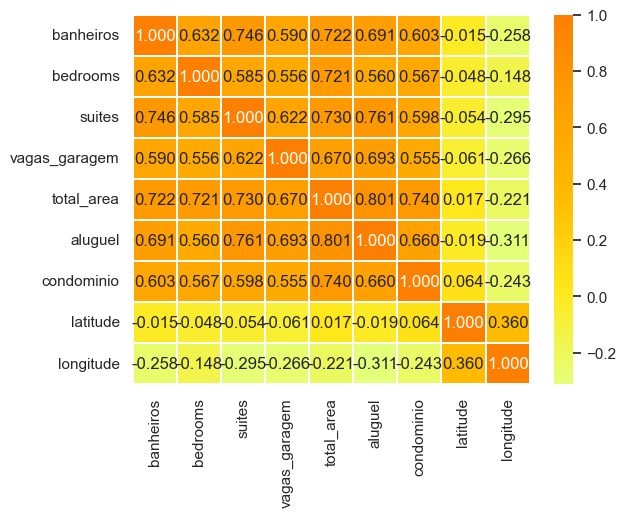

In [114]:
dados_tratados.corr()
sns.heatmap(dados_tratados.corr(),cmap='Wistia',annot=True, fmt='.3f', linewidths=.2)

<font color="#800080"><b>OBS.:</b> Observa-se que as variáveis que mais influenciam diretamente o valor do aluguel são a área total, o nº de suites, o nº de banheiros e o nº de vagas de garagem.</font>

### <li><font color="#800080">Visualizando as Correlações em Gráficos:</font>

<Axes: xlabel='bedrooms', ylabel='aluguel'>

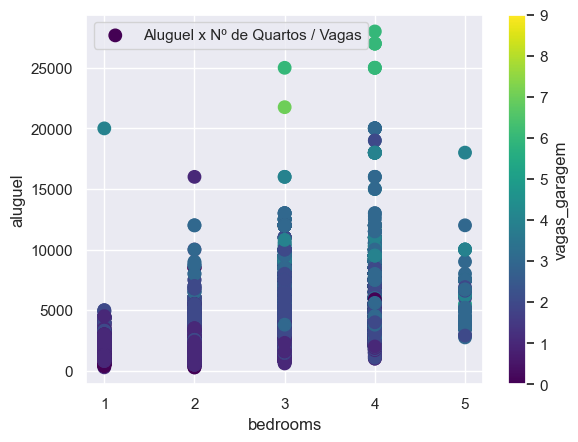

In [115]:
dados_tratados.plot.scatter(x='bedrooms', y='aluguel', c= 'vagas_garagem', cmap= 'viridis', label= 'Aluguel x Nº de Quartos / Vagas', s=80)

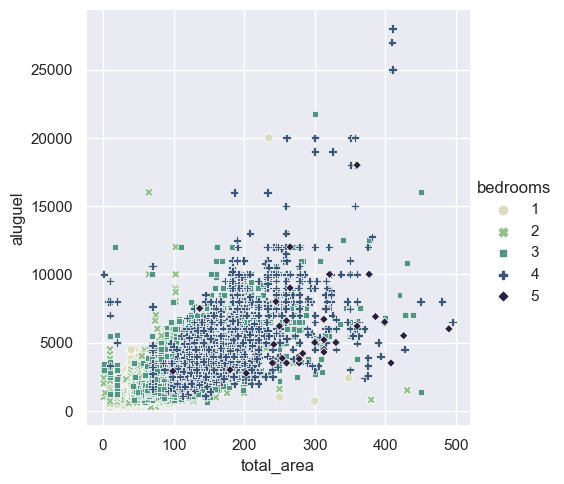

In [116]:
sns.set_theme(style="darkgrid")
sns.relplot(data= dados_tratados, x='total_area', y= 'aluguel',hue= 'bedrooms', style= 'bedrooms', palette= 'ch: s=.5, r=-.8')

### <li><font color="#800080">Visualizando a Distribuição Geográfica dos Aluguéis:</font>

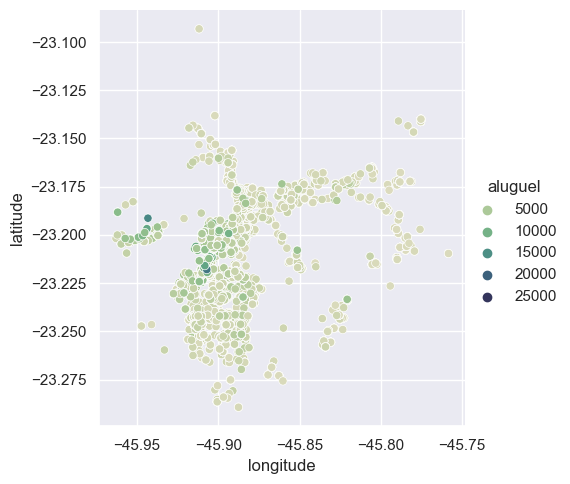

In [117]:
sns.relplot(data= dados_tratados, x='longitude', y= 'latitude',hue= 'aluguel', palette= 'ch: s=.5, r=-.8')

<hr>

# <b>4) Algoritmos de Aprendizado de Máquina</b>

In [ ]:
%pip install sklearn
%pip install -U scikit-learn

In [119]:
from sklearn.model_selection import train_test_split

### <li><font color="#800080">Dividindo os dados em Dados de Entrada e Dados de Saída do Modelo:</font>

In [120]:
# Definindo x como os dados de entrada.
x = dados_tratados.drop(columns='aluguel')
# Defininfo y como dados de saída.
y = dados_tratados['aluguel']

### <li><font color="#800080">Dividindo os dados em Dados de Treino e Dados de Teste:</font>

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### <li><font color="#800080">Treinando os modelos de Inteligência Artificial:</font>

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# Fase de treino dos modelos
# Modelo Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
# Modelo RANSAC
ran_reg = RANSACRegressor()
ran_reg.fit(x_train, y_train)
# Modelo Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

### <li><font color="#800080">Testando os Modelos:</font>

In [124]:
# Registrando os testes dos 3 modelos
test_pred_lin = lin_reg.predict(x_test)
test_pred_ran = ran_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

### <li><font color="#800080">Avaliando os Resultados dos Testes:</font>

In [125]:
# Resultado do modelo de regressão linear
r2_lin = metrics.r2_score(y_test,test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f'R² da Regressão Linear: {r2_lin}')
print(f'RSME da Regressão Linear: {rmse_lin}')

R² da Regressão Linear: 0.7407131532750505
RSME da Regressão Linear: 980.483395976766


In [126]:
# Resultado do modelo RANSAC
r2_ran = metrics.r2_score(y_test,test_pred_ran)
rmse_ran = np.sqrt(metrics.mean_squared_error(y_test, test_pred_ran))
print(f'R² da Regressão RANSAC: {r2_ran}')
print(f'RSME da Regressão RANSAC: {rmse_ran}')

R² da Regressão RANSAC: 0.5515579486163507
RSME da Regressão RANSAC: 1289.4460190857412


In [127]:
# Resultado do modelo Random Forest
r2_rf = metrics.r2_score(y_test,test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f'R² da Regressão Random Forest: {r2_rf}')
print(f'RSME da Regressão Random Forest: {rmse_rf}')

R² da Regressão Random Forest: 0.9201626724079764
RSME da Regressão Random Forest: 544.067765682708
